A Carpentry style lesson on machine learning with Python and scikit-learn
The Carpentries Incubator

https://carpentries-incubator.github.io/machine-learning-novice-sklearn/

In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Regression

## Coding a linear regression 

In [24]:
def least_squares(data):
    x_sum = 0
    y_sum = 0
    x_sq_sum = 0
    xy_sum = 0
    
    # the list of data should have two equal length columns
    assert len(data[0]) == len(data[1])
    assert len(data) == 2
    
    n = len(data[0])
    # least squares regression calculation
    for i in range(0,n):
        x = data[0][i]
        y = data[1][i]
        x_sum = x_sum + x
        y_sum = y_sum + y
        x_sq_sum = x_sq_sum + (x**2)
        xy_sum = xy_sum + (x*y)
        
    m = ((n * xy_sum) - (x_sum * y_sum))
    m = m / ((n * x_sq_sum) - (x_sum **2))
    c = (y_sum - m * x_sum) / n
    
    print('Results of linear regression:')
    print('x_sum=', x_sum, 'y_sum=', y_sum, 'x_sq_sum=', x_sq_sum, 'xy_sum=',
         xy_sum)
    print('m=', m, 'c=', c)
    
    return m,c

In [9]:
# example data
x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]
least_squares([x_data,y_data])

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


(1.5182926829268293, 0.30487804878048763)

## Test the accuracy of a linear regression model

In [4]:
def measure_error(data1, data2):
    assert len(data1) == len(data2)
    err_total = 0
    for i in range(0, len(data1)):
        err_total = err_total + (data1[i] - data2[i]) **2
        
    err = math.sqrt(err_total / len(data1))
    return err

In [14]:
# get the m and c values from the least_squares function
m, c = least_squares([x_data, y_data])

# create an empty list for the model y data
linear_data = []

for x in x_data:
    y = m*x + c
    # add the result to the linear_data list
    linear_data.append(y)
    
# calculate the error
print(measure_error(y_data,linear_data))

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763
0.7986268703523449


## Graph the Data

Results of linear regression:
x_sum= 26 y_sum= 41 x_sq_sum= 168 xy_sum= 263
m= 1.5182926829268293 c= 0.30487804878048763


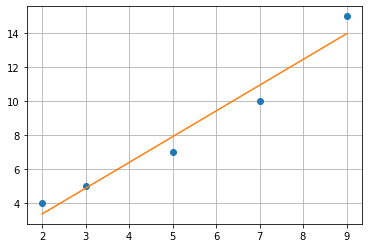

In [5]:
def make_linear(x_data, m, c):
    linear_data = []
    for x in x_data:
        y = m*x + c
        # add the result to the linear_data list
        linear_data.append(y)
    return(linear_data)

x_data = [2,3,5,7,9]
y_data = [4,5,7,10,15]

m, c = least_squares([x_data, y_data])
linear_data = make_linear(x_data, m, c)

plt.plot(x_data,y_data,'o')
plt.plot(x_data,make_linear(x_data, m,c))
plt.grid()

# Predicting Life Expectancy

In [11]:
def process_life_expectancy_data(filename, country, min_date, max_date):
    
    df = pd.read_csv(filename, index_col="Life expectancy")
    
    # get the life expectancy for the specified country/dates
    # we have to convert the dates to strings as pandas treats them that way
    life_expectancy = df.loc[country, str(min_date):str(max_date)]
    
    # create a list with the numerical range of min_date to max_date
    # we could use the index of life_expectancy but it will be a string
    # we need numerical data
    x_data = list(range(min_date, max_date+1))
    
    # calculate a line of best fit
    m, c = least_squares([x_data, life_expectancy])
    linear_data = make_linear(x_data, m, c)
    
    error = measure_error(life_expectancy, linear_data)
    print('Error is ', error)
    
    plt.plot(x_data,life_expectancy,'o')
    plt.plot(x_data,make_linear(x_data, m,c))
    plt.grid()


Results of linear regression:
x_sum= 120780 y_sum= 4546.599999999999 x_sq_sum= 239163310 xy_sum= 9006753.530000001
m= 0.23720412480183278 c= -395.12974087812074
Error is  0.3958118239003424


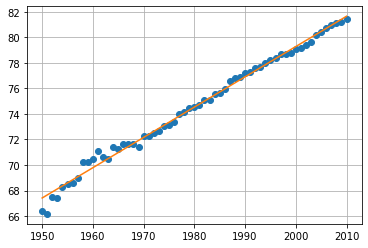

In [14]:
process_life_expectancy_data("./data/gapminder-life-expectancy.csv",
                            'France', 1950, 2010)

Results of linear regression:
x_sum= 47550 y_sum= 1228.96 x_sq_sum= 90441400 xy_sum= 2337962.67
m= 0.3698076923076923 c= -654.2158307692308
Error is  0.12913371722008962


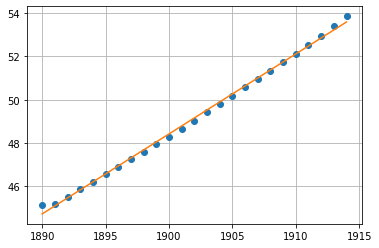

In [16]:
# predict life expectancy in Canada

process_life_expectancy_data("./data/gapminder-life-expectancy.csv",
                            'Canada', 1890, 1914)

In [21]:
# predict in 1918
print("Predicted: ", 0.3698076923076923 * 1918 - 654.2158307692308)

df = pd.read_csv('./data/gapminder-life-expectancy.csv', index_col="Life expectancy")

print('Actual: ', df.loc['Canada', '1918'])

Predicted:  55.07532307692293
Actual:  47.17


# Log Regression


In [26]:
def read_data(gdp_file, life_expectancy_file, year):
    df_gdp = pd.read_csv(gdp_file, index_col = 'Country Name')
    
    gdp = df_gdp.loc[:,year]
    
    df_life_extp = pd.read_csv(life_expectancy_file,
                              index_col='Life expectancy')
    
    #get the life expectancy for the specified country/dates
    # we have to convert the dates to strings for pandas
    life_expectancy = df_life_extp.loc[:,year]
    
    data = []
    
    for country in life_expectancy.index:
        if country in gdp.index:
            # exclude any country were data is unknown
            if (math.isnan(life_expectancy[country]) is False) and \
                (math.isnan(gdp[country]) is False):
                data.append((country, life_expectancy[country], gdp[country]))
            else:
                print('Excluding ', country, ',NaN in data(life_exp = ',
                      life_expectancy[country], 'gdp=', gdp[country], ')')
        else:
            print(country, 'is not in the GDP country data')
    
    combined = pd.DataFrame.from_records(data, columns=('Country',
                                                       'Life Expectancy',
                                                       'GDP'))
    combined = combined.set_index('Country')
    
    # we will need sorted data for graphing properly later on
    combined = combined.sort_values('Life Expectancy')
    return combined

In [44]:
def process_data(gdp_file, life_expectancy_file, year):
    data = read_data(gdp_file, life_expectancy_file, year)

    gdp = data["GDP"].tolist()
    gdp_log = data["GDP"].apply(math.log).tolist()
    life_exp = data["Life Expectancy"].tolist()

    m, c = least_squares([life_exp, gdp_log])

    # list for logarithmic version
    log_data = []
    # list for raw version
    linear_data = []
    for x in life_exp:
        y_log = m * x + c
        log_data.append(y_log)

        y = math.exp(y_log)
        linear_data.append(y)

    # uncomment for log version, further changes needed in make_graph too
    # make_graph(life_exp, gdp_log, log_data)
    #make_graph(life_exp, gdp, linear_data)
    plt.figure(1)
    plt.plot(life_exp, gdp, 'o')
    plt.plot(life_exp,linear_data,'r')
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(life_exp, gdp_log, 'o')
    plt.plot(life_exp,log_data,'r')
    plt.grid()

    err = measure_error(linear_data, gdp)
    print("error=", err)

Excluding  Afghanistan ,NaN in data(life_exp =  41.96 gdp= nan )
Excluding  American Samoa ,NaN in data(life_exp =  nan gdp= nan )
Excluding  Andorra ,NaN in data(life_exp =  nan gdp= 40495.698015877 )
Excluding  Armenia ,NaN in data(life_exp =  72.72 gdp= nan )
Excluding  Aruba ,NaN in data(life_exp =  72.29 gdp= nan )
Excluding  Azerbaijan ,NaN in data(life_exp =  65.55 gdp= nan )
Excluding  Belarus ,NaN in data(life_exp =  70.57 gdp= nan )
Excluding  Bermuda ,NaN in data(life_exp =  nan gdp= 61083.4509496361 )
Excluding  Bosnia and Herzegovina ,NaN in data(life_exp =  74.82 gdp= nan )
Excluding  British Virgin Islands ,NaN in data(life_exp =  nan gdp= nan )
Brunei is not in the GDP country data
Excluding  Cambodia ,NaN in data(life_exp =  28.16 gdp= nan )
Cape Verde is not in the GDP country data
Excluding  Cayman Islands ,NaN in data(life_exp =  nan gdp= nan )
Excluding  Channel Islands ,NaN in data(life_exp =  73.44 gdp= nan )
Christmas Island is not in the GDP country data
Cocos 

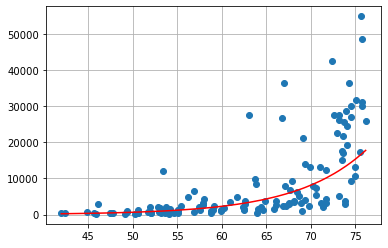

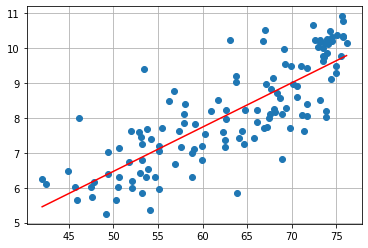

In [45]:
process_data('./data/worldbank-gdp.csv',
            './data/gapminder-life-expectancy.csv',
            '1980')